# Cleaning and Analyzing Employee Exit Surveys
In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment(DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The original TAFE exit survey data is no longer available and some slight modifications were made to the original datasets by Dataquest to make them easier to work with, including changing the encoding to UTF-8. 

In this project, I'll play the role of data analyst and pretend my stakeholders want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want me to combine the results for both surveys to answer these questions. However although both used the same survey template, one of the customized some of the answers. In this project I aim to do most of the data cleaning and get started with analyzing the first question. 

A data dictionary wasn't provided with the dataset but for this project, I'll use general knowledge to define the columns. Below is a preview of a couple columns we'll work with from the dete_survey.csv
- ID: an id used to identify the participant of the survey
- SeparationType: the reason why the person's employment ended
- CeaseDate: The year or month the person's employment ended
- DETE Start Date: the year the person began employment with the DETE

Next is a preview of a couple columns I'll work with from the tafe_survey.csv:
- Record ID: used to identify the participant of the survey
- Reason for ceasing employment: the reason why the person's employment ended
- LengthOfServiceOverall. Overall length of service at institute (in years): the length of the person's employment in years

In [227]:
# import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read the dete survey file into pandas
dete_survey = pd.read_csv('dete_survey.csv')

# read the tafe survey file into pandas
tafe_survey = pd.read_csv('tafe_survey.csv')


In [228]:
# print out first five rows of dete
display(dete_survey.head(5))

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [229]:
# print info about dete
col_index_number = [*range(dete_survey.shape[1])]

with pd.option_context('display.max_columns', None,'display.max_rows', None):
    display(pd.DataFrame({'Column #': col_index_number,
                          'Data ype': dete_survey.dtypes,
                          'NotNull': dete_survey.notnull().sum()}
                        ))

,Column #,Data ype,NotNull
ID,0,int64,822
SeparationType,1,object,822
Cease Date,2,object,822
DETE Start Date,3,object,822
Role Start Date,4,object,822
Position,5,object,817
Classification,6,object,455
Region,7,object,822
Business Unit,8,object,126
Employment Status,9,object,817


In [230]:
def missing_col(data):

#Check missing values for all columns and sort them descending in a dataframe

#missing per column
    missing = round(data.isnull().sum()
                         / len(data) * 100, 1)

#check how many values are not null in each column
    total_notnull = data.notnull().sum()                 

#create a df of both series, filter to show only columns missing more than 50% and sort values
    df = pd.DataFrame({'Total NotNull':total_notnull,'% Missing':missing})
    
    return display(df[df['% Missing']>50].sort_values(by='% Missing', ascending=False))

missing_col(dete_survey)


,Total NotNull,% Missing
Torres Strait,3,99.6
South Sea,7,99.1
Aboriginal,16,98.1
Disability,23,97.2
NESB,32,96.1
Business Unit,126,84.7


In [231]:
# print first five rows of tafe
display(tafe_survey.head(5))

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [232]:
# print info about tafe
col_index_number = [*range(tafe_survey.shape[1])]

with pd.option_context('display.max_columns', None,'display.max_rows', None):
    display(pd.DataFrame({'Column #': col_index_number,
                          'Data ype': tafe_survey.dtypes,
                          'NotNull': tafe_survey.notnull().sum()}
                        ))

,Column #,Data ype,NotNull
Record ID,0,float64,702
Institute,1,object,702
WorkArea,2,object,702
CESSATION YEAR,3,float64,695
Reason for ceasing employment,4,object,701
Contributing Factors. Career Move - Public Sector,5,object,437
Contributing Factors. Career Move - Private Sector,6,object,437
Contributing Factors. Career Move - Self-employment,7,object,437
Contributing Factors. Ill Health,8,object,437
Contributing Factors. Maternity/Family,9,object,437


In [233]:
missing_col(tafe_survey)

,Total NotNull,% Missing
Main Factor. Which of these was the main factor for leaving?,113,83.9


# Initial Observations
From my work above, I can make the following observations:
- the dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN
- both surveys contain columns that aren't needed to complete their analysis
- each dataframe contains many of the same columns, but the column names are different
- there are multiple columns and answers that indicate an employee resigned because they were dissatisfied

In [234]:
# read not stated in as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [235]:
# drop unhelpful columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Cleaning up Column Names
Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns I'd like to use for my final analysis:
- ID or Record ID - an id used to identify the participant of the survey
- SeparationType or Reason for ceasing employment - the reason why the participants employment ended
- Cease Date or Cessation Year - the year or month the participant's employment ended
- DETE Start date - the year the participant began employment with the DETE
- LengthofServiceOverall. Overall Length of Service at Institute (in years) - the length of the persons employment in years
- Age or current age. CurrentAge - age of the participant
- Gender or Gender. What is your Gender? - the gender of the participant

In [236]:
# check current columns of dete
display(pd.DataFrame({'Current Column Names':dete_survey_updated.columns}))

,Current Column Names
0,ID
1,SeparationType
2,Cease Date
3,DETE Start Date
4,Role Start Date
5,Position
6,Classification
7,Region
8,Business Unit
9,Employment Status


In [237]:
# update column names by making lowercase, removing trailing whitespace
# also replacing spaces with underscores
dete_survey_updated.columns = (dete_survey_updated.columns
                              .str.lower()
                              .str.replace(' ','_')
                              .str.replace('\s+','',regex=True)
                              )


# display current columns
display(pd.DataFrame({'New Column Names':dete_survey_updated.columns}))

,New Column Names
0,id
1,separationtype
2,cease_date
3,dete_start_date
4,role_start_date
5,position
6,classification
7,region
8,business_unit
9,employment_status


In [238]:
# display current columns for tafe
display(pd.DataFrame({'Current Columns': tafe_survey_updated.columns}))

,Current Columns
0,Record ID
1,Institute
2,WorkArea
3,CESSATION YEAR
4,Reason for ceasing employment
5,Contributing Factors. Career Move - Public Sec...
6,Contributing Factors. Career Move - Private Se...
7,Contributing Factors. Career Move - Self-emplo...
8,Contributing Factors. Ill Health
9,Contributing Factors. Maternity/Family


In [239]:
# update tafe survey columns
col_dict = {'Record ID': 'id', 
            'CESSATION YEAR': 'cease_date', 
            'CurrentAge. Current Age': 'age', 
            'Gender. What is your Gender?': 'gender',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service',
            'Reason for ceasing employment':'separationtype',
            'Classification. Classification':'position',
            'Contributing Factors. Dissatisfaction':'dissatisfaction',
            'Contributing Factors. Job Dissatisfaction':'job_dissatisfaction',
            'Employment Type. Employment Type': 'employment_status'
            }

tafe_survey_updated.rename(columns = col_dict,inplace=True)

# show new column names
display(pd.DataFrame({'New Column Names': tafe_survey_updated.columns}))

,New Column Names
0,id
1,Institute
2,WorkArea
3,cease_date
4,separationtype
5,Contributing Factors. Career Move - Public Sec...
6,Contributing Factors. Career Move - Private Se...
7,Contributing Factors. Career Move - Self-emplo...
8,Contributing Factors. Ill Health
9,Contributing Factors. Maternity/Family


# Removing Unneeded Data
Now that I've renamed the columns that are going to be used in the analysis, I also want to remove more of the data that is not needed for the final end goal.
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Lets see what kind of unique values are in the separationtype columns in each dataframe, to determine the different reasons for employees leaving.

In [240]:
# checking unique values in dete
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [241]:
# checking unique values in tafe
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

For this project, I'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'. The dete_survey_updated dataframe contains multiple separation types with the string 'Resignation'
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate
I want to account for each of these variations, so that I don't unintentionally drop data. So for each dataframe I only want to select data the survey respondents who have a resignation separation type.

In [242]:
# select resignation in dete survey
pattern = r"Resignation-\w*"
dete_resignations = (dete_survey_updated.loc[dete_survey_updated['separationtype'].str.contains(pattern),].copy())
dete_resignations.reset_index(drop=True,inplace=True)

# select resignation in tafe survey
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype']=="Resignation",].copy()
tafe_resignations.reset_index(drop=True,inplace=True)

# Verifying the Data
Now I want to verify that the data doesn't contain any major inconsistencies (to the best of our knowledge). Because this is real world data, I don't want to assume that the data being analyzed isn't corrupted in some way. It's not always possible to catch all of these errors, but I want to try my best so as to not end up with a project that is not useful because of bad data.

In this step, I want to check the years in each dataframe for logical inconsistencies like:
- having a start date newer than cease date
- having a cease date years after the current data
- having start dates older than 1940

In [243]:
# view unique values in cease date column
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
07/2006      1
09/2010      1
Name: cease_date, dtype: int64

In [244]:
# extract year by grabbing last 4 characters 
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)

# check for outliers
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [245]:
# check the unique values of start year
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

In [246]:
# view unique values in tafe resignation
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64

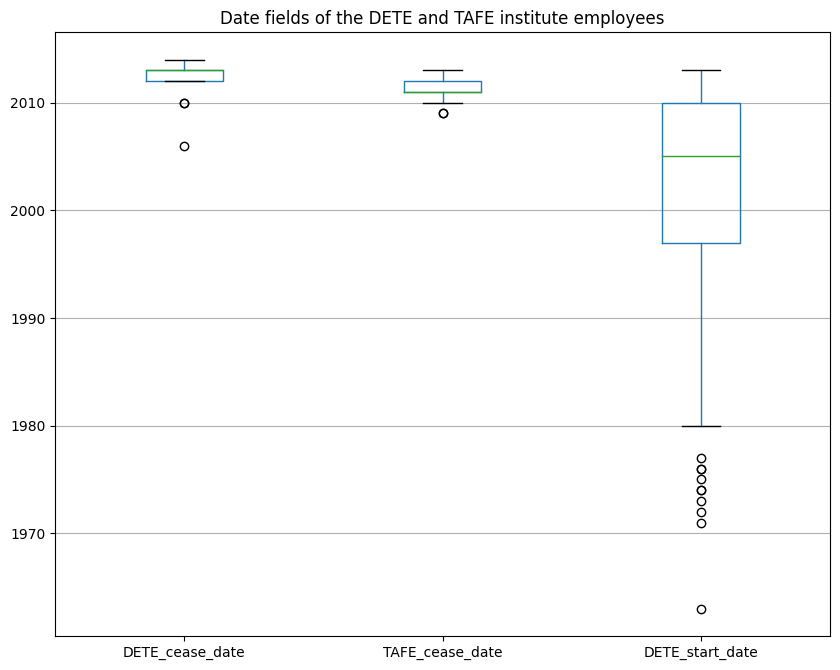

In [247]:
# plot values of dates on a box plot
dates = [dete_resignations['cease_date'], tafe_resignations['cease_date'], dete_resignations['dete_start_date']]
df_dates = pd.DataFrame(dates, index=['DETE_cease_date', 'TAFE_cease_date', 'DETE_start_date']).transpose()
ax = df_dates.plot.box(title='Date fields of the DETE and TAFE institute employees', figsize=(10,8))
ax.yaxis.grid()

The values of the cease_date field in both the DETE and TAFE datasets are within the expected range (despite some outliers). The oldest year in DETE is 2006, while in TAFE it is 2009. Although the data shows some disparity, such a situation should not affect the analysis. I also observed normal values in the start year field despite registering some outliers. With the oldest year being 1963.

# Calculating Time of Service in DETE
Now that I've verified the years in the dete_resignations dataframe, I want to use this data to form a new column. In the HR field the length of time an employee spends in a workplace is referred to as their years of service. The TAFE resignations dataframe already contains a service column, now in order to analyze both surveys together, I'll create a corresponding institute_service column in dete_resignations

In [248]:
# create new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# checking the values
dete_resignations['institute_service'].value_counts(dropna=False).sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
NaN     38
Name: institute_service, dtype: int64

In [249]:
# compare tafe resignations service
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [250]:
# organize service values into bins similar to tafe
dete_resignations['institute_service'].value_counts(bins=9)

(-0.05, 5.444]      115
(5.444, 10.889]      58
(10.889, 16.333]     36
(16.333, 21.778]     24
(21.778, 27.222]     19
(27.222, 32.667]      9
(32.667, 38.111]      6
(38.111, 43.556]      5
(43.556, 49.0]        1
Name: institute_service, dtype: int64

## Findings from Time of Service field
Excluding the null values of the institute_service field from the **TAFE** dataset, 25% of the employees resigned and worked for less than one year. This was followed by 22% of those who worked between 1 and 2 years which makes a total of 47% of resignations from employees that worked 2 years or less. In the **DETE** dataset, I see a similar observation with 42% of employees who worked at most 5 years. 

Now I'll change the values of the institute_service field of **TAFE** dataset. We'll replace the values of each range by their average and this will help with further sorting. So I will implement a function that allows us to extract the numerical values and then obtain their average.

In [251]:
def range_to_unique(val):
    if pd.notna(val):
        if ' ' in val:
            numbers = [int(n) for n in val.split() if n.isdigit()]
        else:
            numbers = [int(n) for n in val.split('-') if n.isdigit()]
        return int(sum(numbers) / len(numbers))
    return np.nan

tafe_resignations['institute_service'] = tafe_resignations['institute_service'].map(range_to_unique)

# Checking values
tafe_resignations['institute_service'].value_counts(dropna=False).sort_index()

1.0     137
3.0      63
5.0      33
8.0      21
15.0     26
20.0     10
NaN      50
Name: institute_service, dtype: int64

## Identifying Dissatisfied Employees
Below are the columns I want to use to categorize employees as dissatisfied from each dataframe.
1. tafe_survey_updated:
    - Dissatisfaction
    - Job Dissatisfaction
2. dete_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.
- True: indicates a person resigned because they were dissatisfied with the job
- False: indicates a person resigned because of a reason other dissatisfaction with the job
- NaN: indicates the value is missing

In [252]:
# finding unique values in 
tafe_resignations['dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: dissatisfaction, dtype: int64

In [253]:
tafe_resignations['job_dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: job_dissatisfaction, dtype: int64

In [254]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isna(x):
        return np.nan
    return True
tafe_resignations['dissatisfied'] = tafe_resignations[['dissatisfaction', 'job_dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Now that we have updated the fields in the **TAFE** dataset, we'll do the same for the fields in the **DETE** dataset. To do this, I'll display the frequencies of all the fields and then see if we need to use the **update_vals** function before updating their values.

In [255]:
dete_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
               'physical_work_environment', 'lack_of_recognition',
               'lack_of_job_security', 'work_location', 
               'employment_conditions', 'work_life_balance',
               'workload']

dete_resignations['dissatisfied'] = dete_resignations[dete_columns].any(axis=1, skipna=False)

dete_resignations['dissatisfied'].value_counts(dropna=False)


False    162
True     149
Name: dissatisfied, dtype: int64

Now I would like to drop the irrelevant columns and focus on only the columns needed to perform the analysis. The columns I would like to keep are:
- id
- cease_date
- position
- age
- employment_status
- gender
- institute_service
- dissatisfied

In [256]:
dete_resignations_up = dete_resignations[['id','cease_date', 'position', 'employment_status', 'gender', 'age', 'institute_service', 'dissatisfied']].copy()
tafe_resignations_up = tafe_resignations[['id', 'cease_date', 'gender',  'age', 'employment_status', 'position', 'institute_service', 'dissatisfied']].copy()

## Combining the Data
Now I want to combine both DataFrames.To do that I need to first add a column to each dataframe that will allow me to easily distinguish between the two dataframes. Then I want to combine both dataframes and drop any columns with less than 500 non null values and then assign to an update variable.

In [258]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

combined.head(5)


,id,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.0,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.0,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,10.0,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,12.0,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


# Classifying Employees by Length of Service
Next, we'll classify the employees basedon their length of service. For this, we'll take into account the values of the column institute_service under the following definitions:
- New: less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace
I'll use these definitions to alter the values in the institute_service column.

In [261]:
def service_category(val):
    if pd.isna(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'

combined['service_cat'] = combined['institute_service'].apply(service_category)
combined['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [263]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

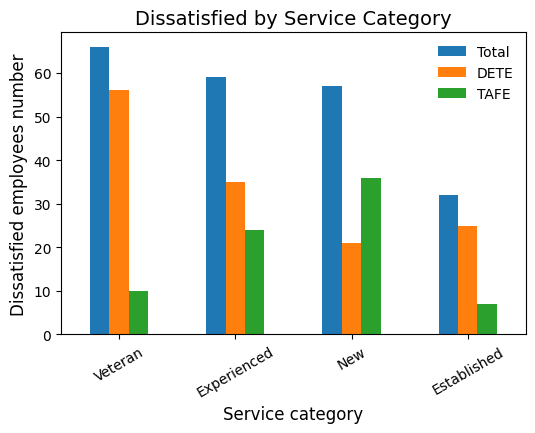

In [264]:
dis_pct = combined.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False).to_frame()

dete_service = combined[combined['institute'] == 'DETE'].reset_index(drop=True)
dis_pct['DETE'] = dete_service.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False)

tafe_service = combined[combined['institute'] == 'TAFE'].reset_index(drop=True)
dis_pct['TAFE'] = tafe_service.pivot_table(index='service_cat', values='dissatisfied', aggfunc=np.sum)['dissatisfied'].sort_values(ascending=False)

dis_pct.rename(columns={'dissatisfied':'Total'}, inplace=True)
dis_pct.index.names = ['S. CATEGORY']

dis_pct.plot(kind='bar', rot=30)
plt.title('Dissatisfied by Service Category', fontsize=14)
plt.xlabel('Service category', fontsize=12)
plt.ylabel('Dissatisfied employees number', fontsize=12)
plt.legend(frameon=False)
plt.show()

# Final Observation
From the bar chart I have come to several different conclusions:
- Focusing on total of dissatisfied employees, the highest number corresponds to the veterans, or those that worked 11 or more years while the established category (7-10) registered the lowest total value
- Similarly I can see a very similar patern with the total in the records of DETE instiute with the only exception being new employees where they prevail over TAFE records.
- The new employee category had the largest number of dissatisfied employees for TAFE institute
- In the DETE institute the highest number of dissatisfied employees were in the veteran group and the lowest number was in the new group
- Compared to the TAFE institute that had the highest number of dissatisfied employees in the new group and the lowest in the established group
- Overall a higher number of employees left the DETE institute becausse of dissatisfaction issues than at TAFE


# Next Steps
So far I've explored the data, corrected some missing values, dropped irrelevant data,